In [289]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import scipy.io as sio
from sklearn.metrics import accuracy_score
import seaborn as sns
import datetime

In [173]:
# reading csv files
data =  pd.read_csv(r'D:\HomeWork\NN\HW1\crx.data' , header = None)
data.replace('?', np.NaN, inplace = True)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [174]:
# Print DataFrame information
data[1] = data[1].astype(float)
data[2] = data[2].astype(float)
data[7] = data[7].astype(float)
data[10] = data[10].astype(float)
data[13] = data[13].astype(float)
data[14] = data[14].astype(float)
data_info = data.info()
print(data_info)

print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    float64
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    float64
 14  14      690 non-null    float64
 15  15      690 non-null    object 
dtypes: float64(6), object(10)
memory usage: 86.4+ KB
None
0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


In [175]:
# Impute the missing values with mean imputation
data.fillna(data.median(), inplace=True)

# Count the number of NaNs in the dataset to verify
print(data.isnull().sum())

0     12
1      0
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
dtype: int64


In [176]:
# Iterate over each column of cc_apps
for col in data:
    # Check if the column is of object type
    if data[col].dtypes == 'object':
        # Impute with the most frequent value
        data = data.fillna(data[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(data.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


In [177]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data.columns:
    # Compare if the dtype is object
    if data[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col])

In [178]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1.0,0,0,202.0,0.0,0
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6.0,0,0,43.0,560.0,0
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0.0,0,0,280.0,824.0,0
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5.0,1,0,100.0,3.0,0
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0.0,0,2,120.0,0.0,0


In [8]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledData = scaler.fit_transform(data)

In [181]:
df = pd.DataFrame(data = rescaledData)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.256842,0.000000,0.666667,0.333333,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.1010,0.00000,0.0
1,0.0,0.675489,0.159286,0.666667,0.333333,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.0215,0.00560,0.0
2,0.0,0.161654,0.017857,0.666667,0.333333,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.1400,0.00824,0.0
3,1.0,0.211729,0.055000,0.666667,0.333333,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.0500,0.00003,0.0
4,1.0,0.096541,0.200893,0.666667,0.333333,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.0600,0.00000,0.0


In [182]:
y = df.pop(15)

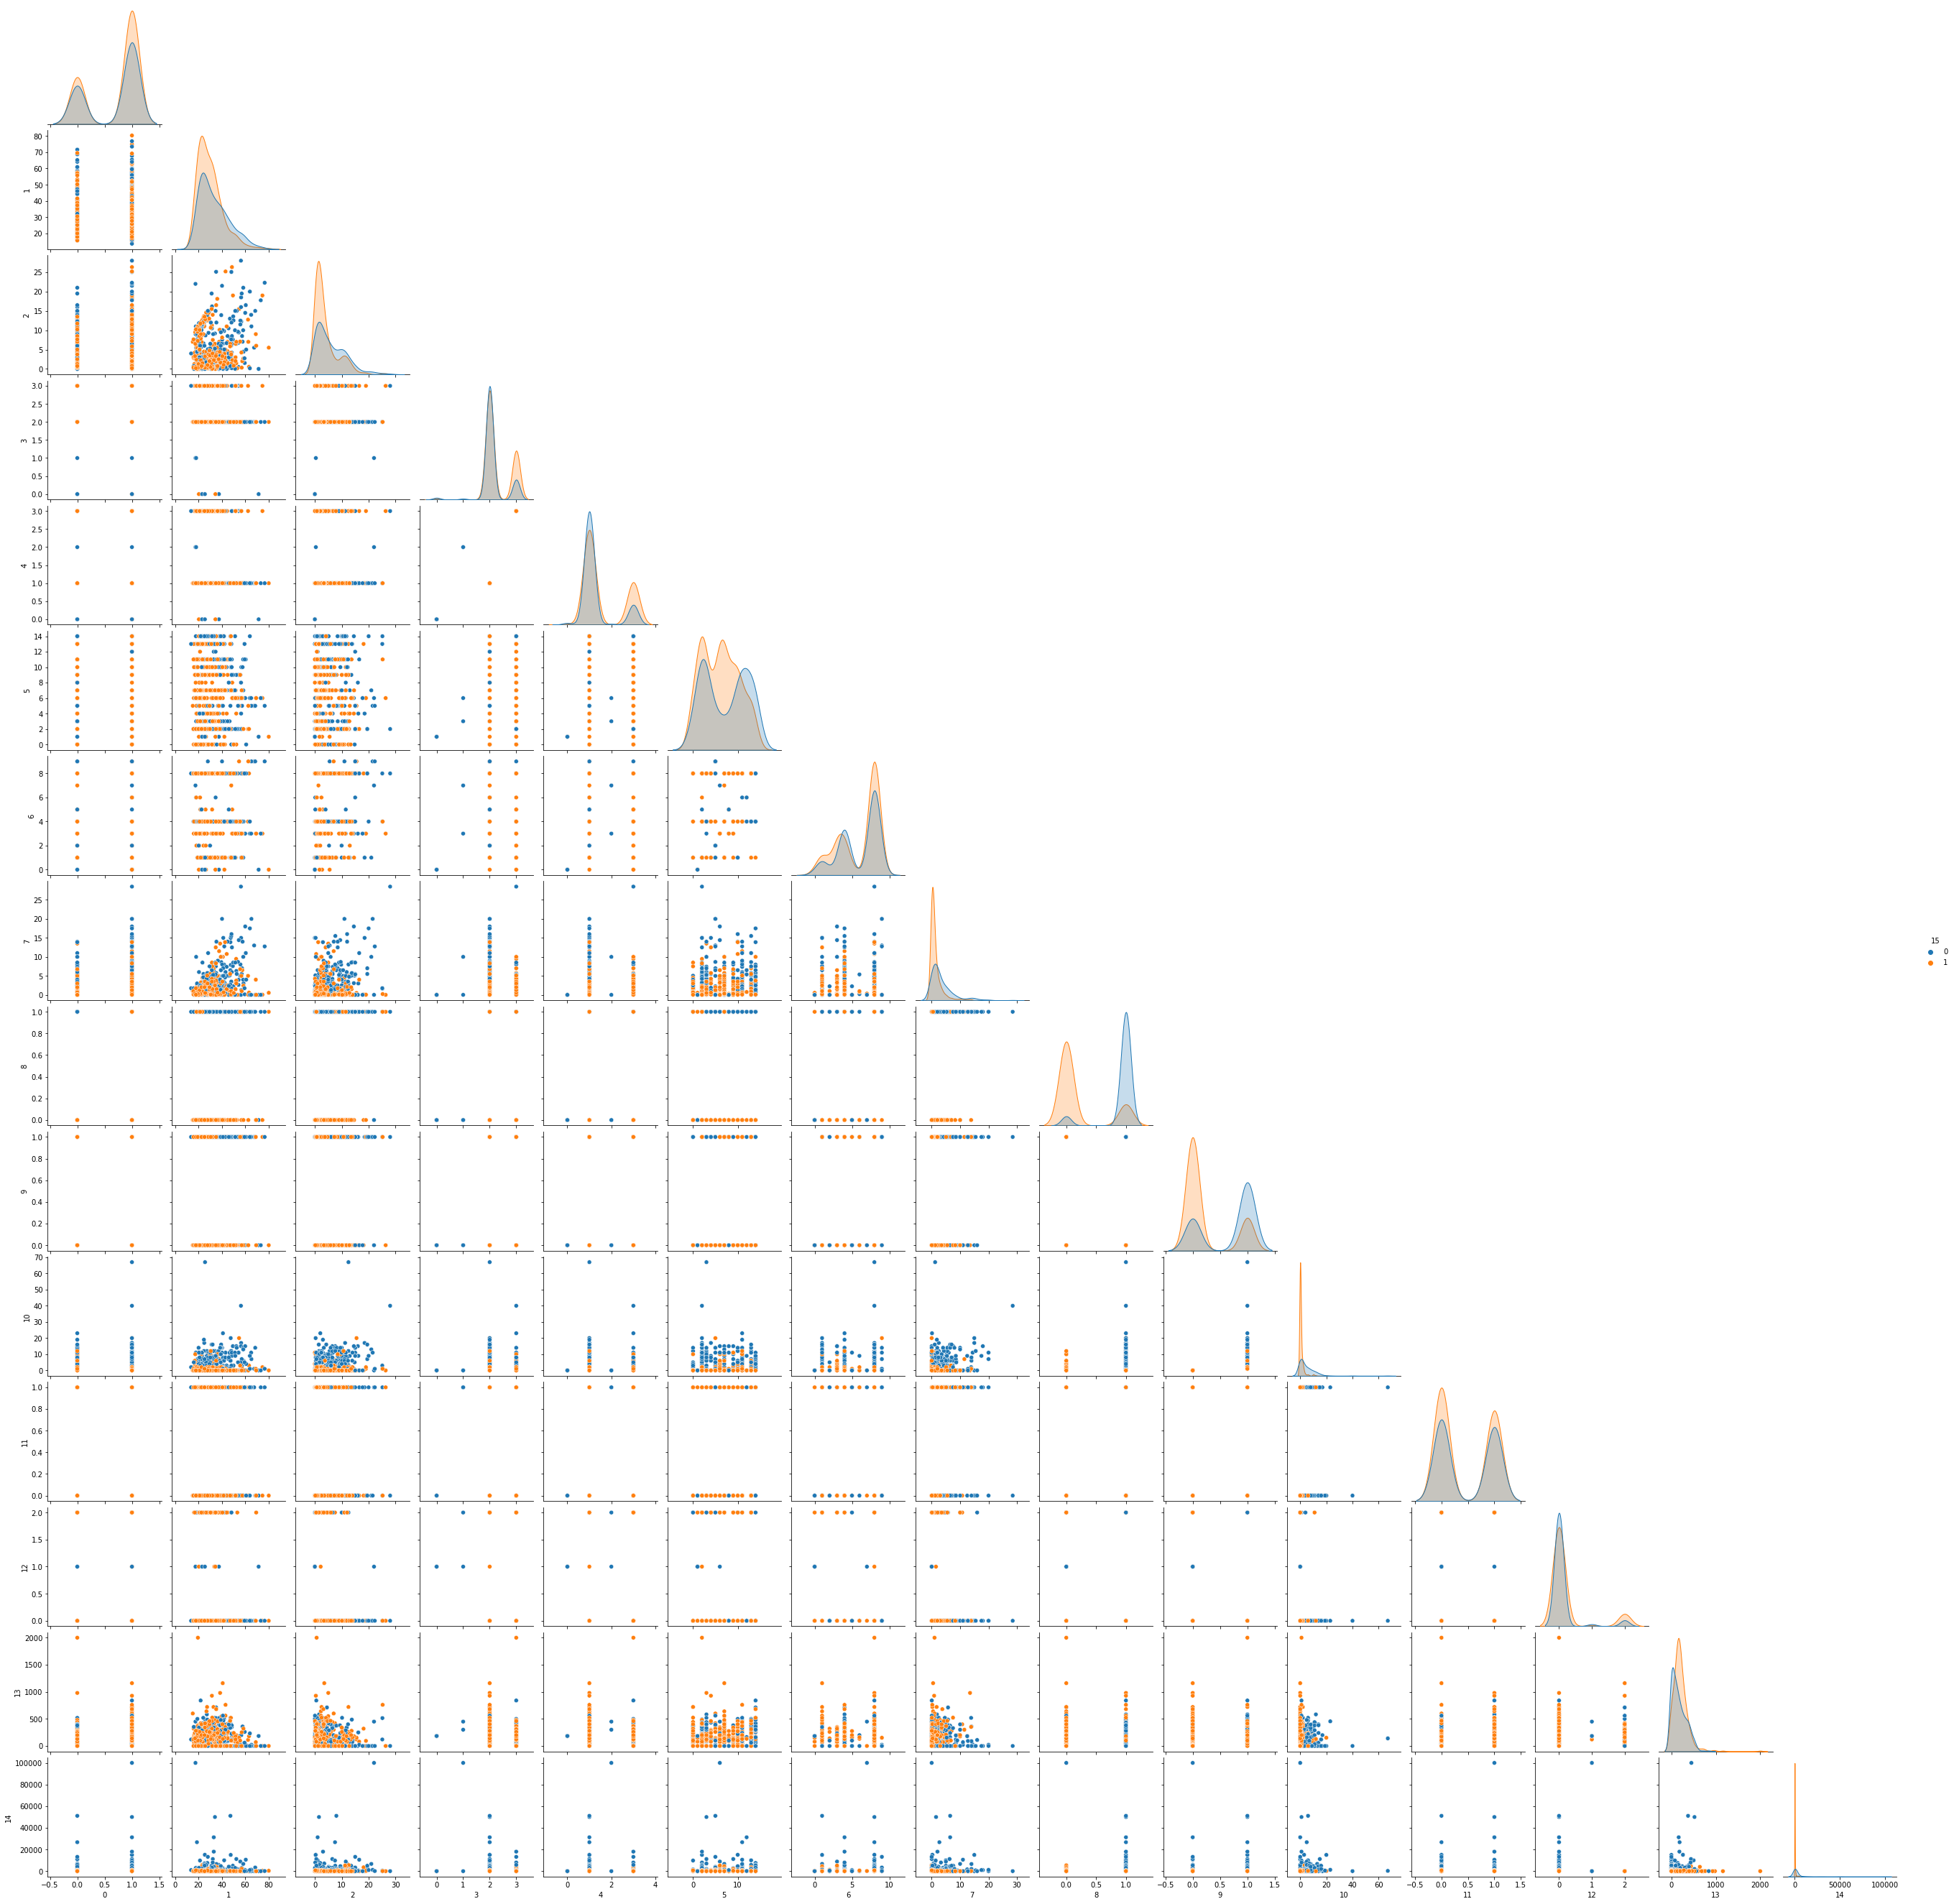

In [10]:
sns.pairplot(df, hue=15, corner=True)

In [183]:
from sklearn.model_selection import train_test_split
X = df.iloc[: , :]
X_train, X_rem, y_train, y_rem = train_test_split(X , y , test_size=0.3)

In [184]:
X_test, X_valid, y_test, y_valid = train_test_split(X_rem , y_rem , test_size=0.333)

In [300]:
from tensorflow import keras
from tensorflow.keras import regularizers

In [222]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [293]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callBack= keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq= 1)

#Question 3
input_layer = keras.Input(shape=(15,), name='input_layer')
hidden_layer=keras.layers.Dense(30, activation='relu', name='hidden_layer')
hidden_layer1=keras.layers.Dense(20, activation='relu', name='hidden_layer1')
output_layer=keras.layers.Dense(2, name='output_layer')

output_value= output_layer(hidden_layer1(hidden_layer(input_layer)))

model= keras.Model(inputs=input_layer, outputs=output_value)

model.compile(optimizer="adam" , loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=["accuracy"])

model.fit(X_train , y_train , epochs=150 , validation_data =(X_valid, y_valid) , callbacks=[tb_callBack])

print("----------------------------------------------------")

test_loss , test_acc = model.evaluate(X_test , y_test , verbose = 2)

Epoch 1/150
16/16 [==============================] - 0s 14ms/step - loss: 0.6881 - accuracy: 0.5549 - val_loss: 0.6762 - val_accuracy: 0.5072
Epoch 2/150
16/16 [==============================] - 0s 6ms/step - loss: 0.6466 - accuracy: 0.7122 - val_loss: 0.6306 - val_accuracy: 0.7536
Epoch 3/150
16/16 [==============================] - 0s 7ms/step - loss: 0.6131 - accuracy: 0.7640 - val_loss: 0.5844 - val_accuracy: 0.8116
Epoch 4/150
16/16 [==============================] - 0s 6ms/step - loss: 0.5713 - accuracy: 0.7826 - val_loss: 0.5445 - val_accuracy: 0.8261
Epoch 5/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5254 - accuracy: 0.8033 - val_loss: 0.4852 - val_accuracy: 0.8261
Epoch 6/150
16/16 [==============================] - 0s 7ms/step - loss: 0.4846 - accuracy: 0.8199 - val_loss: 0.4409 - val_accuracy: 0.8261
Epoch 7/150
16/16 [==============================] - 0s 5ms/step - loss: 0.4429 - accuracy: 0.8385 - val_loss: 0.3944 - val_accuracy: 0.8551
Epoch 8/150


Epoch 59/150
16/16 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.8820 - val_loss: 0.3513 - val_accuracy: 0.8696
Epoch 60/150
16/16 [==============================] - 0s 6ms/step - loss: 0.2646 - accuracy: 0.9027 - val_loss: 0.3483 - val_accuracy: 0.8551
Epoch 61/150
16/16 [==============================] - 0s 6ms/step - loss: 0.2571 - accuracy: 0.9027 - val_loss: 0.3466 - val_accuracy: 0.8261
Epoch 62/150
16/16 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.9110 - val_loss: 0.3627 - val_accuracy: 0.8406
Epoch 63/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2569 - accuracy: 0.9089 - val_loss: 0.3555 - val_accuracy: 0.8261
Epoch 64/150
16/16 [==============================] - 0s 7ms/step - loss: 0.2514 - accuracy: 0.9089 - val_loss: 0.3566 - val_accuracy: 0.8406
Epoch 65/150
16/16 [==============================] - 0s 6ms/step - loss: 0.2524 - accuracy: 0.9048 - val_loss: 0.3593 - val_accuracy: 0.8551
Epoch 

In [290]:
#Question 4
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callBack= keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq= 1)

input_layer = keras.Input(shape=(15,), name='input_layer')
hidden_layer=keras.layers.Dense(18, activation='relu', name='hidden_layer')
output_layer=keras.layers.Dense(2, name='output_layer')

output_value= output_layer(hidden_layer(input_layer))

model= keras.Model(inputs=input_layer, outputs=output_value)

model.compile(optimizer="adam" , loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=["accuracy"])

model.fit(X_train , y_train , epochs=150 , validation_data =(X_valid, y_valid) , callbacks=[tb_callBack])

print("----------------------------------------------------")

test_loss , test_acc = model.evaluate(X_test , y_test , verbose = 2)

Epoch 1/150
16/16 [==============================] - 0s 11ms/step - loss: 0.7370 - accuracy: 0.3168 - val_loss: 0.7346 - val_accuracy: 0.3913
Epoch 2/150
16/16 [==============================] - 0s 6ms/step - loss: 0.7026 - accuracy: 0.5176 - val_loss: 0.7046 - val_accuracy: 0.5797
Epoch 3/150
16/16 [==============================] - 0s 5ms/step - loss: 0.6694 - accuracy: 0.6356 - val_loss: 0.6780 - val_accuracy: 0.6377
Epoch 4/150
16/16 [==============================] - 0s 6ms/step - loss: 0.6390 - accuracy: 0.6853 - val_loss: 0.6531 - val_accuracy: 0.6377
Epoch 5/150
16/16 [==============================] - 0s 5ms/step - loss: 0.6114 - accuracy: 0.7391 - val_loss: 0.6239 - val_accuracy: 0.7536
Epoch 6/150
16/16 [==============================] - 0s 5ms/step - loss: 0.5848 - accuracy: 0.7826 - val_loss: 0.6000 - val_accuracy: 0.8116
Epoch 7/150
16/16 [==============================] - 0s 7ms/step - loss: 0.5605 - accuracy: 0.7950 - val_loss: 0.5782 - val_accuracy: 0.8261
Epoch 8/150


Epoch 59/150
16/16 [==============================] - 0s 8ms/step - loss: 0.3282 - accuracy: 0.8634 - val_loss: 0.3135 - val_accuracy: 0.8841
Epoch 60/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3278 - accuracy: 0.8634 - val_loss: 0.3149 - val_accuracy: 0.8841
Epoch 61/150
16/16 [==============================] - 0s 9ms/step - loss: 0.3264 - accuracy: 0.8634 - val_loss: 0.3136 - val_accuracy: 0.8841
Epoch 62/150
16/16 [==============================] - 0s 8ms/step - loss: 0.3255 - accuracy: 0.8654 - val_loss: 0.3125 - val_accuracy: 0.9130
Epoch 63/150
16/16 [==============================] - 0s 6ms/step - loss: 0.3256 - accuracy: 0.8654 - val_loss: 0.3118 - val_accuracy: 0.9130
Epoch 64/150
16/16 [==============================] - 0s 7ms/step - loss: 0.3250 - accuracy: 0.8634 - val_loss: 0.3154 - val_accuracy: 0.8696
Epoch 65/150
16/16 [==============================] - 0s 6ms/step - loss: 0.3240 - accuracy: 0.8675 - val_loss: 0.3145 - val_accuracy: 0.8841
Epoch 

In [291]:
model.summary()

Model: "model_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 15)]              0         
                                                                 
 hidden_layer (Dense)        (None, 18)                288       
                                                                 
 output_layer (Dense)        (None, 2)                 38        
                                                                 
Total params: 326
Trainable params: 326
Non-trainable params: 0
_________________________________________________________________


In [299]:
#Question 5
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callBack= keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq= 1)

input_layer = keras.Input(shape=(15,), name='input_layer')
hidden_layer=keras.layers.Dense(1024, activation='relu', name='hidden_layer')
hidden_layer1=keras.layers.Dense(512, activation='relu', name='hidden_layer1')
hidden_layer2=keras.layers.Dense(256, activation='relu', name='hidden_layer2')
output_layer=keras.layers.Dense(2, name='output_layer')

output_value= output_layer(hidden_layer2(hidden_layer1(hidden_layer(input_layer))))

model= keras.Model(inputs=input_layer, outputs=output_value)

model.compile(optimizer="adam" , loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=["accuracy"])

model.fit(X_train , y_train , epochs=300 , validation_data =(X_valid, y_valid) , callbacks=[tb_callBack])

print("----------------------------------------------------")

test_loss , test_acc = model.evaluate(X_test , y_test , verbose = 2)

Epoch 1/300
16/16 [==============================] - 1s 29ms/step - loss: 0.4600 - accuracy: 0.8033 - val_loss: 0.3138 - val_accuracy: 0.8841
Epoch 2/300
16/16 [==============================] - 0s 29ms/step - loss: 0.3644 - accuracy: 0.8675 - val_loss: 0.3131 - val_accuracy: 0.8841
Epoch 3/300
16/16 [==============================] - 0s 31ms/step - loss: 0.3220 - accuracy: 0.8675 - val_loss: 0.3698 - val_accuracy: 0.7971
Epoch 4/300
16/16 [==============================] - 0s 28ms/step - loss: 0.3266 - accuracy: 0.8820 - val_loss: 0.3602 - val_accuracy: 0.8261
Epoch 5/300
16/16 [==============================] - 0s 23ms/step - loss: 0.3082 - accuracy: 0.8758 - val_loss: 0.3438 - val_accuracy: 0.8261
Epoch 6/300
16/16 [==============================] - 0s 24ms/step - loss: 0.2928 - accuracy: 0.8841 - val_loss: 0.3851 - val_accuracy: 0.8551
Epoch 7/300
16/16 [==============================] - 0s 23ms/step - loss: 0.2983 - accuracy: 0.8696 - val_loss: 0.3944 - val_accuracy: 0.8116
Epoch 

16/16 [==============================] - 0s 24ms/step - loss: 0.0437 - accuracy: 0.9834 - val_loss: 2.2227 - val_accuracy: 0.7536
Epoch 116/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 2.4067 - val_accuracy: 0.7681
Epoch 117/300
16/16 [==============================] - 0s 23ms/step - loss: 0.0347 - accuracy: 0.9834 - val_loss: 2.5095 - val_accuracy: 0.7536
Epoch 118/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0298 - accuracy: 0.9876 - val_loss: 2.4956 - val_accuracy: 0.7681
Epoch 119/300
16/16 [==============================] - 0s 20ms/step - loss: 0.0248 - accuracy: 0.9876 - val_loss: 2.5994 - val_accuracy: 0.7826
Epoch 120/300
16/16 [==============================] - 0s 20ms/step - loss: 0.0589 - accuracy: 0.9834 - val_loss: 2.6378 - val_accuracy: 0.8261
Epoch 121/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0475 - accuracy: 0.9814 - val_loss: 2.4662 - val_accuracy: 0.7971
Epoch 

Epoch 172/300
16/16 [==============================] - 0s 20ms/step - loss: 0.0945 - accuracy: 0.9689 - val_loss: 2.0958 - val_accuracy: 0.7391
Epoch 173/300
16/16 [==============================] - 0s 20ms/step - loss: 0.0633 - accuracy: 0.9752 - val_loss: 1.9000 - val_accuracy: 0.7971
Epoch 174/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 2.0319 - val_accuracy: 0.7536
Epoch 175/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0288 - accuracy: 0.9938 - val_loss: 2.3161 - val_accuracy: 0.7681
Epoch 176/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 0.9876 - val_loss: 2.3531 - val_accuracy: 0.8116
Epoch 177/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0233 - accuracy: 0.9896 - val_loss: 2.5347 - val_accuracy: 0.7536
Epoch 178/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0267 - accuracy: 0.9896 - val_loss: 2.5060 - val_accuracy:

Epoch 229/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 3.5280 - val_accuracy: 0.7826
Epoch 230/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0164 - accuracy: 0.9938 - val_loss: 3.5433 - val_accuracy: 0.7826
Epoch 231/300
16/16 [==============================] - 0s 19ms/step - loss: 0.0127 - accuracy: 0.9938 - val_loss: 3.4859 - val_accuracy: 0.7971
Epoch 232/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0159 - accuracy: 0.9938 - val_loss: 3.5445 - val_accuracy: 0.7681
Epoch 233/300
16/16 [==============================] - 0s 25ms/step - loss: 0.0530 - accuracy: 0.9834 - val_loss: 3.4821 - val_accuracy: 0.7246
Epoch 234/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0686 - accuracy: 0.9772 - val_loss: 2.9067 - val_accuracy: 0.8261
Epoch 235/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0957 - accuracy: 0.9689 - val_loss: 2.4740 - val_accuracy:

Epoch 286/300
16/16 [==============================] - 0s 23ms/step - loss: 0.0079 - accuracy: 0.9938 - val_loss: 3.3756 - val_accuracy: 0.7826
Epoch 287/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0104 - accuracy: 0.9938 - val_loss: 3.3509 - val_accuracy: 0.7826
Epoch 288/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0119 - accuracy: 0.9938 - val_loss: 3.3848 - val_accuracy: 0.7826
Epoch 289/300
16/16 [==============================] - 0s 20ms/step - loss: 0.0114 - accuracy: 0.9938 - val_loss: 3.4710 - val_accuracy: 0.7826
Epoch 290/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0175 - accuracy: 0.9938 - val_loss: 3.4630 - val_accuracy: 0.7826
Epoch 291/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0250 - accuracy: 0.9938 - val_loss: 3.2269 - val_accuracy: 0.7826
Epoch 292/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0096 - accuracy: 0.9959 - val_loss: 3.2573 - val_accuracy:

In [346]:
#Question 6
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callBack= keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq= 1)

input_layer = keras.Input(shape=(15,), name='input_layer')
hidden_layer=keras.layers.Dense(18, activation='relu', name='hidden_layer', activity_regularizer = regularizers.l2(0.02))
output_layer=keras.layers.Dense(2, name='output_layer')

output_value= output_layer(hidden_layer(input_layer))

model= keras.Model(inputs=input_layer, outputs=output_value)

model.compile(optimizer="adam" , loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=["accuracy"])

model.fit(X_train , y_train , epochs=150 , validation_data =(X_valid, y_valid) , callbacks=[tb_callBack])

print("----------------------------------------------------")

test_loss , test_acc = model.evaluate(X_test , y_test , verbose = 2)


Epoch 1/150
16/16 [==============================] - 0s 11ms/step - loss: 0.7631 - accuracy: 0.4513 - val_loss: 0.6883 - val_accuracy: 0.6812
Epoch 2/150
16/16 [==============================] - 0s 4ms/step - loss: 0.7178 - accuracy: 0.5901 - val_loss: 0.6697 - val_accuracy: 0.7391
Epoch 3/150
16/16 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.6812 - val_loss: 0.6502 - val_accuracy: 0.8116
Epoch 4/150
16/16 [==============================] - 0s 4ms/step - loss: 0.6611 - accuracy: 0.7764 - val_loss: 0.6279 - val_accuracy: 0.7826
Epoch 5/150
16/16 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.7971 - val_loss: 0.6043 - val_accuracy: 0.8116
Epoch 6/150
16/16 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.8199 - val_loss: 0.5795 - val_accuracy: 0.8551
Epoch 7/150
16/16 [==============================] - 0s 4ms/step - loss: 0.5834 - accuracy: 0.8323 - val_loss: 0.5536 - val_accuracy: 0.8696
Epoch 8/150


Epoch 59/150
16/16 [==============================] - 0s 4ms/step - loss: 0.3421 - accuracy: 0.8758 - val_loss: 0.3209 - val_accuracy: 0.8986
Epoch 60/150
16/16 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.8737 - val_loss: 0.3181 - val_accuracy: 0.8841
Epoch 61/150
16/16 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.8675 - val_loss: 0.3183 - val_accuracy: 0.8841
Epoch 62/150
16/16 [==============================] - 0s 4ms/step - loss: 0.3417 - accuracy: 0.8696 - val_loss: 0.3202 - val_accuracy: 0.8986
Epoch 63/150
16/16 [==============================] - 0s 4ms/step - loss: 0.3399 - accuracy: 0.8675 - val_loss: 0.3218 - val_accuracy: 0.8841
Epoch 64/150
16/16 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 0.8654 - val_loss: 0.3221 - val_accuracy: 0.8986
Epoch 65/150
16/16 [==============================] - 0s 4ms/step - loss: 0.3372 - accuracy: 0.8737 - val_loss: 0.3208 - val_accuracy: 0.8986
Epoch 

In [294]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 5244), started 7:07:44 ago. (Use '!kill 5244' to kill it.)